# XGBoost Regressor

In [19]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBRegressor
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    early_stopping_rounds=10,
    random_state=42
)

# Train with validation set
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {mse**0.5:.2f}")
print(f"R²: {r2:.2f}")

# Feature Importance
importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance)

RMSE: 0.47
R²: 0.83

Feature Importance:
      Feature  Importance
0      MedInc    0.515730
5    AveOccup    0.119820
2    AveRooms    0.089050
7   Longitude    0.082453
6    Latitude    0.069157
1    HouseAge    0.068217
3   AveBedrms    0.039612
4  Population    0.015960


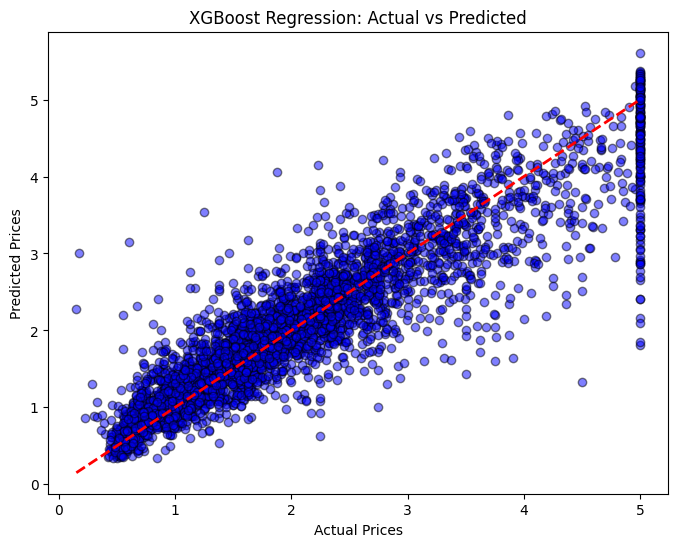

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost Regression: Actual vs Predicted")
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Optimized R² Score:", r2_score(y_test, y_pred_best))

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits


KeyboardInterrupt: 

In [21]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBRegressor
model = xgb.XGBRegressor()

# Train with validation set
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {mse**0.5:.2f}")
print(f"R²: {r2:.2f}")

# Feature Importance
importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance)

RMSE: 0.47
R²: 0.83

Feature Importance:
      Feature  Importance
0      MedInc    0.489623
5    AveOccup    0.148580
7   Longitude    0.107952
6    Latitude    0.090290
1    HouseAge    0.070058
2    AveRooms    0.043091
3   AveBedrms    0.025678
4  Population    0.024728


# XGBoost For Classification

### Binary Classification

In [43]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    n_estimators=100,            # Number of trees
    learning_rate=0.1,           # Learning rate
    max_depth=5,                 # Maximum depth of trees
    subsample=0.8,               # Fraction of samples used per tree
    colsample_bytree=0.8,        # Fraction of features used per tree
    gamma=1,                     # Minimum loss reduction for a split
    reg_lambda=1,                # L2 regularization
    reg_alpha=0,                 # L1 regularization
    eval_metric='logloss',       # Evaluation metric
    early_stopping_rounds=10,   # Early stopping
    random_state=42              # Random seed
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 1 70]]


### Multi-Class Classification Example

In [44]:
# Initialize XGBClassifier for multi-class classification
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=3,                # Number of classes
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_lambda=1,
    eval_metric='mlogloss',     # Multi-class log loss
    early_stopping_rounds=10,
    random_state=42
)

## Feature Importance

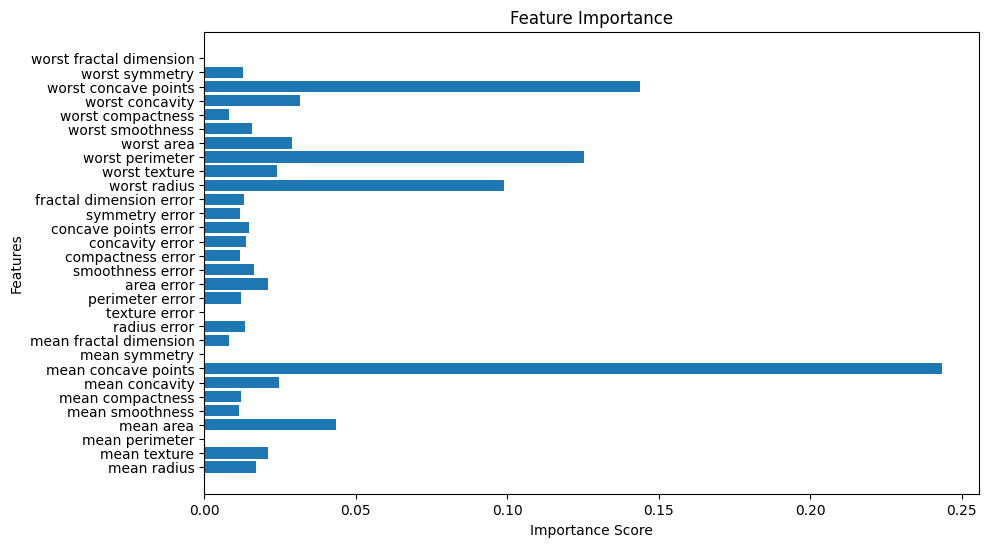

In [37]:
import matplotlib.pyplot as plt

# Get feature importance
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
importance.sort()